## 1. NLP CountVectorizer

CountVectorizer is a fundamental tool used in Natural Language Processing (NLP) for converting a collection of text documents into a matrix of token counts. This process is part of the text preprocessing workflow before applying machine learning algorithms to the text data.

Here's a breakdown of how CountVectorizer works and its key features:

- Tokenization:
  - CountVectorizer tokenizes the text by extracting words (tokens) based on specific rules, typically separating words by whitespace or using a predefined tokenizer. It can also handle n-grams (sequences of words) as tokens.

- Counting Frequencies:
  - After tokenization, CountVectorizer builds a vocabulary of all unique words (or n-grams) in the documents and counts the occurrence of each word in every document.

- Vectorization:
  - The result is a sparse matrix where each row represents a document and each column represents a word in the vocabulary. The values in the matrix are the word counts (or frequencies) in each document.

- Features:
  - CountVectorizer supports several parameters, including:
    - max_features: Limits the vocabulary size by selecting the most frequent words.
    - stop_words: Filters out common words (e.g., "and", "the") which may not be informative.
    - ngram_range: Specifies the range of n-grams to consider (e.g., unigrams, bigrams).
    - binary: If true, it uses binary occurrence instead of frequency.


Below is and illustration of how CountVectorizer works.

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://www.researchgate.net/publication/354354484/figure/fig2/AS:1080214163595268@1634554534648/Illustration-of-count-vectorization.jpg"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>


    Code Example:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "This is a sample document.",
    "Another example document.",
    "This document is short."
]

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Learn vocabulary and transform documents into a document-term matrix
X = vectorizer.fit_transform(documents)

# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Convert matrix to array and display as DataFrame
import pandas as pd
df = pd.DataFrame(X.toarray(), columns=feature_names)
df


,another,document,example,is,sample,short,this
0,0,1,0,1,1,0,1
1,1,1,1,0,0,0,0
2,0,1,0,1,0,1,1


In [ ]:
# Print the matrix X (token counts)
print("Matrix X (token counts):")
print(X.toarray())

Matrix X (token counts):
[[0 1 0 1 1 0 1]
 [1 1 1 0 0 0 0]
 [0 1 0 1 0 1 1]]


## 2. How to Compute and Print Accuracy

In machine learning, accuracy is a metric used to evaluate the performance of a classification model. It measures the proportion of correctly predicted instances (or observations) out of the total number of instances.

the accuracy of a classification model can be calculated as:

<div align="center", style=" font-size: 80%">
Accuracy = $\frac{Number of Correct Predictions}{Total Number of Predictions} = \frac{TP+TN}{TP+TN+FP+FN}$
</div>

In simpler terms:

- Accuracy measures the proportion of correctly predicted instances (both positive and negative) out of the total number of instances.
- A higher accuracy score indicates that the model is making more correct predictions.

*However, accuracy might not always be the most suitable metric, especially when dealing with imbalanced datasets (where one class is much more frequent than the other). In such cases, accuracy alone can be misleading. For example, if 90% of the instances belong to one class, a model that predicts that class for all instances would achieve 90% accuracy, but it would not be useful in practice.*

    Code Example:

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic dummy data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.82


## 3. Interpreting Confusion Matrix


Interpreting a confusion matrix is essential for understanding the performance of a classification model. A confusion matrix is a table that summarizes the performance of a classification model on a set of test data for which the true values are known. It provides a breakdown of predicted versus actual class labels.

Let's break down a confusion matrix and understand how to interpret its components using a typical binary classification scenario:

**Components of a Confusion Matrix**

Consider a binary classification problem where we have two classes: "Positive" (P) and "Negative" (N).

- True Positive (TP): Instances that belong to the positive class (P) and are correctly predicted as positive by the model.

- False Positive (FP): Instances that belong to the negative class (N) but are incorrectly predicted as positive by the model (Type I error).

- True Negative (TN): Instances that belong to the negative class (N) and are correctly predicted as negative by the model.

- False Negative (FN): Instances that belong to the positive class (P) but are incorrectly predicted as negative by the model (Type II error).

<div align="center">


                  Predicted Class

|          | Positive (1) | Negative (0)|
|:--------:|:--------:|:--------:|
|  **Positive (1)**   |  TP   |  FN   |
|  **Negative (0)**   |  FP   |  TN   |

</div>


Note: The **above table** is **NOT** the way Scikit-Learn interpretes Confusion Matrix

**Scikit-Learn** Interpretes Confusion Matrix in the table **below**

<div align="center">

                    Predicted Class

|          | Negative (0) | Positive (1)|
|:--------:|:--------:|:--------:|
|  **Negative (0)**   |  TN   |  FP   |
|  **Positive (1)**   |  FN   |  TP   |

</div>




- TP (True Positive): The number of instances correctly predicted as positive.

- FN (False Negative): The number of instances incorrectly predicted as negative when they are actually positive.

- FP (False Positive): The number of instances incorrectly predicted as positive when they are actually negative.

- TN (True Negative): The number of instances correctly predicted as negative.


    Code Example:

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Generate synthetic dummy data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN from confusion matrix
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

print()
# Print TP, FP, TN, FN
print("True Positive (TP):", TP)
print("False Positive (FP):", FP)
print("True Negative (TN):", TN)
print("False Negative (FN):", FN)


Confusion Matrix:
[[81 23]
 [13 83]]

True Positive (TP): 83
False Positive (FP): 23
True Negative (TN): 81
False Negative (FN): 13


## 4. Hyperparameter Tuning

Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning algorithm to optimize its performance on a given dataset.

Hyperparameter tuning can be approached using several techniques, each with its own advantages and trade-offs. Here are some common types of hyperparameter tuning methods:

- **Grid Search:**
 - Method: Involves defining a grid of hyperparameter values to search **exhaustively**.
 - Process: Iterates through all combinations of hyperparameters specified in the grid and evaluates each combination using cross-validation.
 - Pros:
    - Guarantees finding the best combination of hyperparameters within the specified grid.
    - Simple and straightforward to implement.
 - Cons:
    - Can be computationally expensive, especially with a large number of hyperparameters and values.
    - May not be efficient for continuous or large search spaces.

- **Randomized Search:**
  - Method: Involves sampling random combinations of hyperparameter values from specified distributions.
  - Process: Randomly selects a **fixed number** of combinations and evaluates them using cross-validation.
  - Pros:
    - More efficient for large search spaces compared to grid search.
    - Can handle both discrete and continuous hyperparameters.
  - Cons:
    - Does not guarantee finding the optimal solution as it relies on random sampling.
    - The number of iterations may need tuning to balance exploration and exploitation.

Other types of hyperparameter tuning includes;
- Bayesian Optimization:
- Evolutionary Algorithms:
- Gradient-Based Optimization:

Each of these methods has its strengths and weaknesses, and the choice of approach depends on factors such as the complexity of the hyperparameter space, the computational budget, and the characteristics of the objective function. Experimentation with different techniques and careful tuning of parameters are often required to achieve optimal performance in hyperparameter tuning.

**Image illustrating Grid Search and Random Search;**

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F1bf0f3af-22ce-46b1-a0a5-d34ee4544514_772x441.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

The random search algorithm randomly samples hyperparameter values from the defined distributions and then tests them by generating a model. Like grid search, random search uses a pre-defined metric to determine the best set of hyperparameter values.  Random search has been found to be more efficient for hyperparameter optimization - both in theory and in practice. Random search effectively searches a larger configuration space than grid search.



Part of the reason random search typically outperforms grid search is that typically, only a few hyperparameters really matter for a given dataset, and finding the optimal values for these dominant hyperparameters will have more impact than getting an optimal combination of all hyperparameters. The hyperparameters that are important are different across datasets, so there is not a way of knowing which hyperparameters matter most for your specific dataset (i.e., there is no free lunch). Random search is more likely than grid search to find the optimal value for the important hyperparameter values because it searches a larger area for hyperparameter values (given the same computational budget).




<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://community.alteryx.com/t5/image/serverpage/image-id/74545i97245FDAA10376E9/image-size/large?v=v2&px=999"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

    Code Example:

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

# Generate synthetic dummy data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}

# Initialize the Support Vector Classifier (SVC)
svc = SVC()

# Initialize GridSearchCV with the SVC classifier and parameter grid
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy: 0.94375


**Total number of iteration for GridSearchCV**


    'C': 4 values to iterate,
    'kernel': 2 values to iterate,
    'gamma': 3 values to iterate

Total number of iterateion = 4 x 2 x 3 = 24 models

Each model will be trained on 5 folds of the data


In [ ]:
# Implementing RandomSearch CV
from sklearn.model_selection import RandomizedSearchCV


# Initialize RandomizedSearchCV with the SVC classifier and parameter distribution
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Perform random search to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters and corresponding score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)


NameError: name 'svc' is not defined

## 5. Modify the param_grid for a GreadSearchCV

To modify the param_grid of an existing GridSearchCV object;
- Add the new hyperparameter to the param_grid dictionary
- fit the existing GridSearchCV object to the training data.

Note: You do **NOT** need to re-instantiate the GridSearchCV


    Code Example:

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Generate synthetic dummy data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the initial parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, ],
    'kernel': ['linear', 'rbf'],
}

# Initialize the Support Vector Classifier (SVC)
svc = SVC(random_state=42)

# Initialize GridSearchCV with the SVC classifier and initial param_grid
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', )

# Update the para_grid with the new hyperparameter
param_grid['gamma'] = [0.1, 0.01]


# Fit the GridSearchCV again with the modified param_grid
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and corresponding cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9412499999999999


## 6. Adjusting a Hyperparameter value of an SVC Model

    Code Example:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an SVC model with default hyperparameters
svc_model = SVC(C=1.0, kernel='rbf', gamma='scale')



# Update the value of C (adjusting the regularization parameter)
svc_model.set_params(C=0.5)


# train the model with updated hyperparameters on the entire training set
svc_model.fit(X_train, y_train)

# View the model Parameters
svc_model.get_params()

{'C': 0.5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## 7. Clasification Report

A classification report is a method of evaluating the performance of a classification model by providing a summary of key metrics for each class in the dataset. It is particularly useful when dealing with classification tasks where the goal is to assign an instance to one of multiple predefined classes or categories.

The classification report typically includes the following metrics for each class:

- Precision:
  - Precision measures the proportion of true positive predictions (correctly predicted instances) **among all instances predicted as belonging to a particular class**. It is calculated as:
  - *Precision* = $\frac{True Positives}{True Positives + False Positives}$
  - Precision indicates the accuracy of positive predictions for a specific class. A high precision value suggests that **when the model predicts a positive class, it is likely to be correct**.

- Recall (Sensitivity):
  - Recall measures the proportion of true positive predictions (correctly predicted instances) **among all actual instances that belong to a particular class**. It is calculated as:
  - *Recall* = $\frac{True Positives}{True Positives+False Negatives}$
  - Recall indicates the ability of the model to correctly identify all instances of a specific class. A high recall value suggests that **the model is sensitive to the presence of the class**.

- F1-Score:
  - The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when classes are imbalanced. It is calculated as:
  - *F1-Score* = 2 × $\frac{Precision× Recall}{Precision+Recall}$
  - The F1-score reaches its best value at 1 (perfect precision and recall) and its worst value at 0.

- Support:
  - Support represents the number of actual occurrences of each class in the dataset. It is the number of true instances for each class.


    Code Example:

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Generate synthetic dummy data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Classifier (SVC)
svc = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)

# Train the SVC classifier on the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc.predict(X_test)

# Print the classification report (NOT Efficient Coding Practice)
print("NOT Efficient Coding Practice because it is assigned to a variable report and saved to memory")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

print()
# Print the classification report (Efficient Coding Practice)
print("Efficient Coding Practice because it just prints and not using memory")
print("Classification Report:\n", classification_report(y_test, y_pred))

NOT Efficient Coding Practice because it is assigned to a variable report and saved to memory
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       104
           1       0.94      0.98      0.96        96

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200


Efficient Coding Practice because it just prints and not using memory
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       104
           1       0.94      0.98      0.96        96

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



## 8. Misclassified Samples

The number of misclassified samples of a model refers to the count of instances in the test set that were incorrectly predicted by the model. These are the instances where the predicted label (output from the model) does not match the true label (actual ground truth label).

To calculate the number of misclassified samples, you can compare the predicted labels (y_pred) with the true labels (y_true) and count the instances where they differ.


    Code Example

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_predict_and_report(X_train, y_train, X_test, y_test):
    # Step i: Train the model
    model = LogisticRegression()  # Example: Using Logistic Regression
    model.fit(X_train, y_train)

    # Step ii: Predict the test set labels
    y_pred = model.predict(X_test)

    # Step iii: Count the number of misclassified samples
    misclassified_samples = (y_pred != y_test).sum()

    # Step iv: Print the result
    print(f"Number of misclassified samples: {misclassified_samples}")

# Example usage:
# Assuming X_train, X_test, y_train, y_test are already defined

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Call the function to train, predict, and print results
train_predict_and_report(X_train, y_train, X_test, y_test)


Number of misclassified samples: 36


## 9. Precision Recall Trade-offs

Understanding the trade-offs between precision and recall is crucial in evaluating and optimizing classification models, especially in scenarios where the class distribution is imbalanced or the cost of **false positives** and **false negatives** varies.
**Definitions**

- Precision: **The proportion of predicted positive instances that are actually positive**. It measures the accuracy of positive predictions.
<div align="center">
Precision = $\frac{TP}{TP+FP}$
</div>

- Recall (Sensitivity): **The proportion of actual positive instances that are correctly predicted as positive**. It measures the ability of the model to identify all positive instances.
<div align="center">
Recall= $\frac{TP}{TP+FN}$
</div>

**Precision-Recall Trade-off**

- Precision-Recall Curve: A graphical representation that shows the trade-off between precision and recall at different thresholds.
  - Each point on the curve represents a different threshold for predicting positive class labels.
  - Moving the threshold for classification affects both precision and recall.
​

**Trade-offs and Use Cases**

- High Precision:
  - Suitable when the cost of **false positives is high** (e.g., in medical diagnostics where a false positive could lead to unnecessary treatments).
  - Focuses on **minimizing false positive** at the expense of potentially missing some true positives.

- High Recall:
  - Important when the cost of **false negatives is high** (e.g., in fraud detection where missing a fraudulent transaction is costly).
  - Focuses on **minimizing false negative** at the expense of potentially missing some true negative.
  - Emphasizes capturing as many positive instances as possible, even at the risk of higher false positives.

**Adjusting the Trade-off**

In the context of classification models, the threshold refers to a value used to make a decision about the predicted class labels based on the model's output probabilities or scores. When a classifier predicts the probability of a sample belonging to a certain class (e.g., positive class), a threshold is applied to convert these probabilities into discrete class predictions.

- Threshold Adjustment:
  - By changing the classification threshold, you can adjust the trade-off between precision and recall.
  - Lowering the threshold increases recall but may decrease precision, and vice versa.

- Model Selection:
  - Choose a model based on the specific requirements and priorities of the application.
  - Use precision, recall, F1-score, and other evaluation metrics to compare and select the best model for the given use case.


<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://miro.medium.com/v2/resize:fit:1248/1*TqzfzabXrej1FTdZuNNYIQ.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>


**Practical Considerations**

- Imbalanced Classes:
  - In scenarios with imbalanced classes, optimizing solely for accuracy may not be sufficient.
  - Consider using precision, recall, or F1-score to assess model performance more comprehensively.




    Code Example



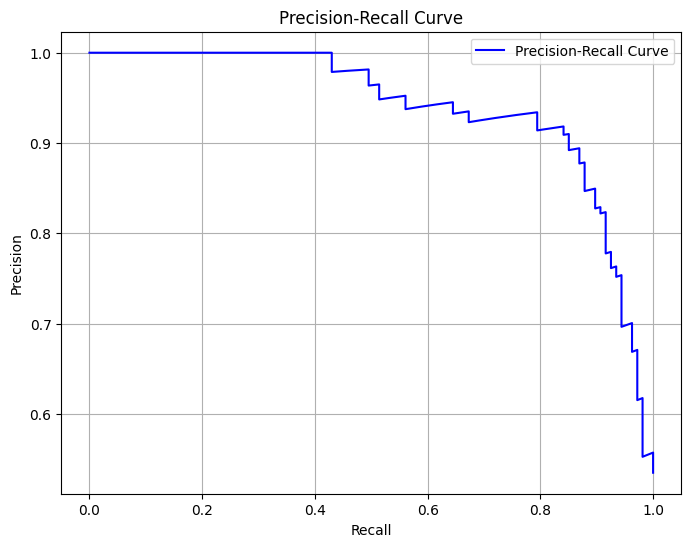

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


    Code Example

In [ ]:
import pandas as pd
pd.DataFrame(data=[thresholds, precision, recall]).set_index(pd.Index(["Thresholds", "Precision", "Recall"])).T

,Thresholds,Precision,Recall
0,0.002820,0.535000,1.000000
1,0.003337,0.537688,1.000000
2,0.003791,0.540404,1.000000
3,0.004425,0.543147,1.000000
4,0.004797,0.545918,1.000000
...,...,...,...
196,0.999008,1.000000,0.037383
197,0.999373,1.000000,0.028037
198,0.999478,1.000000,0.018692
199,0.999827,1.000000,0.009346


In [ ]:
thresholds

array([0.00282014, 0.00333743, 0.00379067, 0.00442489, 0.00479681,
       0.00540631, 0.00597639, 0.00710695, 0.00809071, 0.0114572 ,
       0.01301475, 0.0138346 , 0.01482591, 0.01821643, 0.01886999,
       0.01912917, 0.02034842, 0.02472672, 0.02499844, 0.02821846,
       0.03214769, 0.03487677, 0.0421629 , 0.04519972, 0.04618539,
       0.04718903, 0.04802179, 0.04810664, 0.04876595, 0.04932778,
       0.05396072, 0.05421462, 0.05422912, 0.05433003, 0.05701041,
       0.05752645, 0.05997328, 0.06017626, 0.06687969, 0.07110928,
       0.07605716, 0.07665951, 0.08147488, 0.08437592, 0.08515805,
       0.08593247, 0.08752646, 0.08957979, 0.09835634, 0.09958243,
       0.10357857, 0.10417754, 0.10501068, 0.10690501, 0.11028911,
       0.11055969, 0.11113497, 0.11802273, 0.12469223, 0.12545459,
       0.12647337, 0.1301934 , 0.13680667, 0.13803035, 0.15593745,
       0.15748029, 0.16748245, 0.17084627, 0.18354163, 0.20246974,
       0.20365695, 0.20646656, 0.21314204, 0.2147069 , 0.21779